# Scikit-learn Wine Dataset Classification
## 와인 품종 분류 분석

### 데이터셋 소개
- **출처**: UCI Machine Learning Repository (scikit-learn 내장)
- **샘플 수**: 178개
- **특성 수**: 13개 (화학적 분석 결과)
- **클래스 수**: 3개 (이탈리아 동일 지역의 3가지 와인 품종)
- **용도**: 다중 클래스 분류 (Multi-class Classification)

### 학습 목표
1. 탐색적 데이터 분석 (EDA)
2. 데이터 전처리(pre-processing) 및 특성 스케일링(feature Engineering)
3. 다양한 분류 모델 학습
4. 모델 성능 평가 및 비교
5. 최적 모델 선정 및 하이퍼파라미터 튜닝

---
## 1. 라이브러리 임포트 및 데이터 로드

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 시각화 설정
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.unicode_minus'] = False

# scikit-learn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# 분류 모델
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 평가 지표
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, RocCurveDisplay
)

print("라이브러리 임포트 완료!")

라이브러리 임포트 완료!


In [4]:
# sklearn안에 내장된 toy dataset wine 데이터 로드
wine = load_wine()

# DataFrame 생성
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['target_name'] = df['target'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

In [5]:


print("데이터셋 정보:")
print(f"  - 샘플 수: {len(df)}")
print(f"  - 특성 수: {len(wine.feature_names)}")
print(f"  - 클래스: {wine.target_names}")
print(f"\n특성 목록:")
for i, name in enumerate(wine.feature_names, 1):
    print(f"  {i:2d}. {name}")

데이터셋 정보:
  - 샘플 수: 178
  - 특성 수: 13
  - 클래스: ['class_0' 'class_1' 'class_2']

특성 목록:
   1. alcohol
   2. malic_acid
   3. ash
   4. alcalinity_of_ash
   5. magnesium
   6. total_phenols
   7. flavanoids
   8. nonflavanoid_phenols
   9. proanthocyanins
  10. color_intensity
  11. hue
  12. od280/od315_of_diluted_wines
  13. proline


In [6]:
# 데이터 미리보기
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,class_0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,class_0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,class_0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,class_0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,class_0


---
## 2. 탐색적 데이터 분석 (EDA)

### 2.1 기본 정보 확인

In [7]:
# 데이터 타입 및 결측치
print("데이터 정보:")
print("=" * 50)
df.info()

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 1

In [8]:
# 기술 통계량(소수점 셋째자리까지 반올림)
df.describe().round(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893,0.938
std,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907,0.775
min,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000,0.000
25%,12.362,1.602,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500,0.000
50%,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500,1.000
75%,13.678,3.082,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000,2.000
max,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000,2.000


In [9]:
# 결측치 확인
print("결측치 개수:")
print(df.isnull().sum())
print(f"\n전체 결측치: {df.isnull().sum().sum()}")

결측치 개수:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
target_name                     0
dtype: int64

전체 결측치: 0


### 2.2 타겟 변수 분포

클래스 분포:
  Class 0 (class_0): 59 (33.1%)
  Class 1 (class_1): 71 (39.9%)
  Class 2 (class_2): 48 (27.0%)


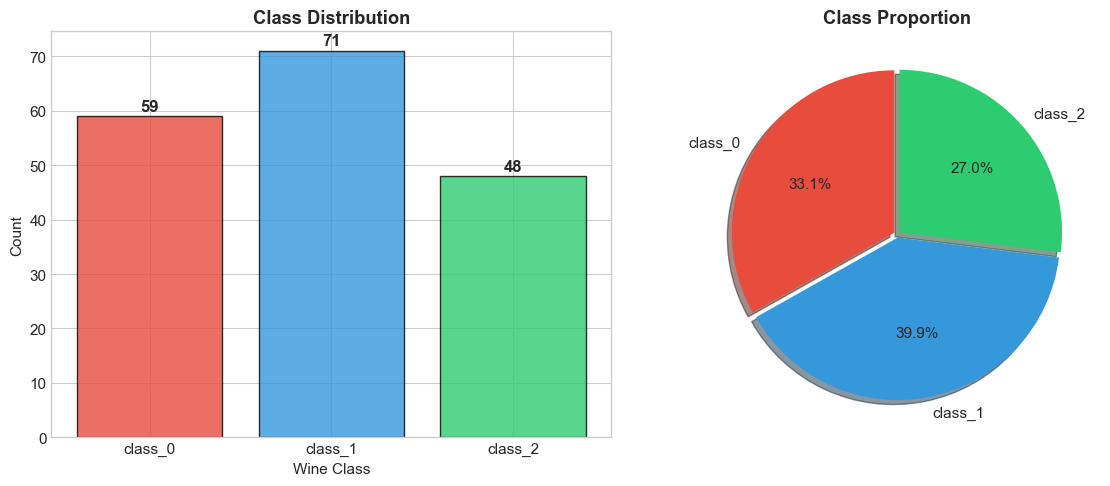

In [10]:
# 클래스 분포
print("클래스 분포:")
class_counts = df['target'].value_counts().sort_index()
for idx, count in class_counts.items():
    print(f"  Class {idx} ({wine.target_names[idx]}): {count} ({count/len(df)*100:.1f}%)")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 막대 그래프
colors = ['#e74c3c', '#3498db', '#2ecc71']
bars = axes[0].bar(wine.target_names, class_counts.values, color=colors, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Wine Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution', fontweight='bold')
for bar, count in zip(bars, class_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(count), ha='center', fontsize=12, fontweight='bold')

# 파이 차트
axes[1].pie(class_counts.values, labels=wine.target_names, autopct='%1.1f%%',
            colors=colors, explode=(0.02, 0.02, 0.02), shadow=True, startangle=90)
axes[1].set_title('Class Proportion', fontweight='bold')

plt.tight_layout()
plt.show()

### 2.3 특성 분포 시각화

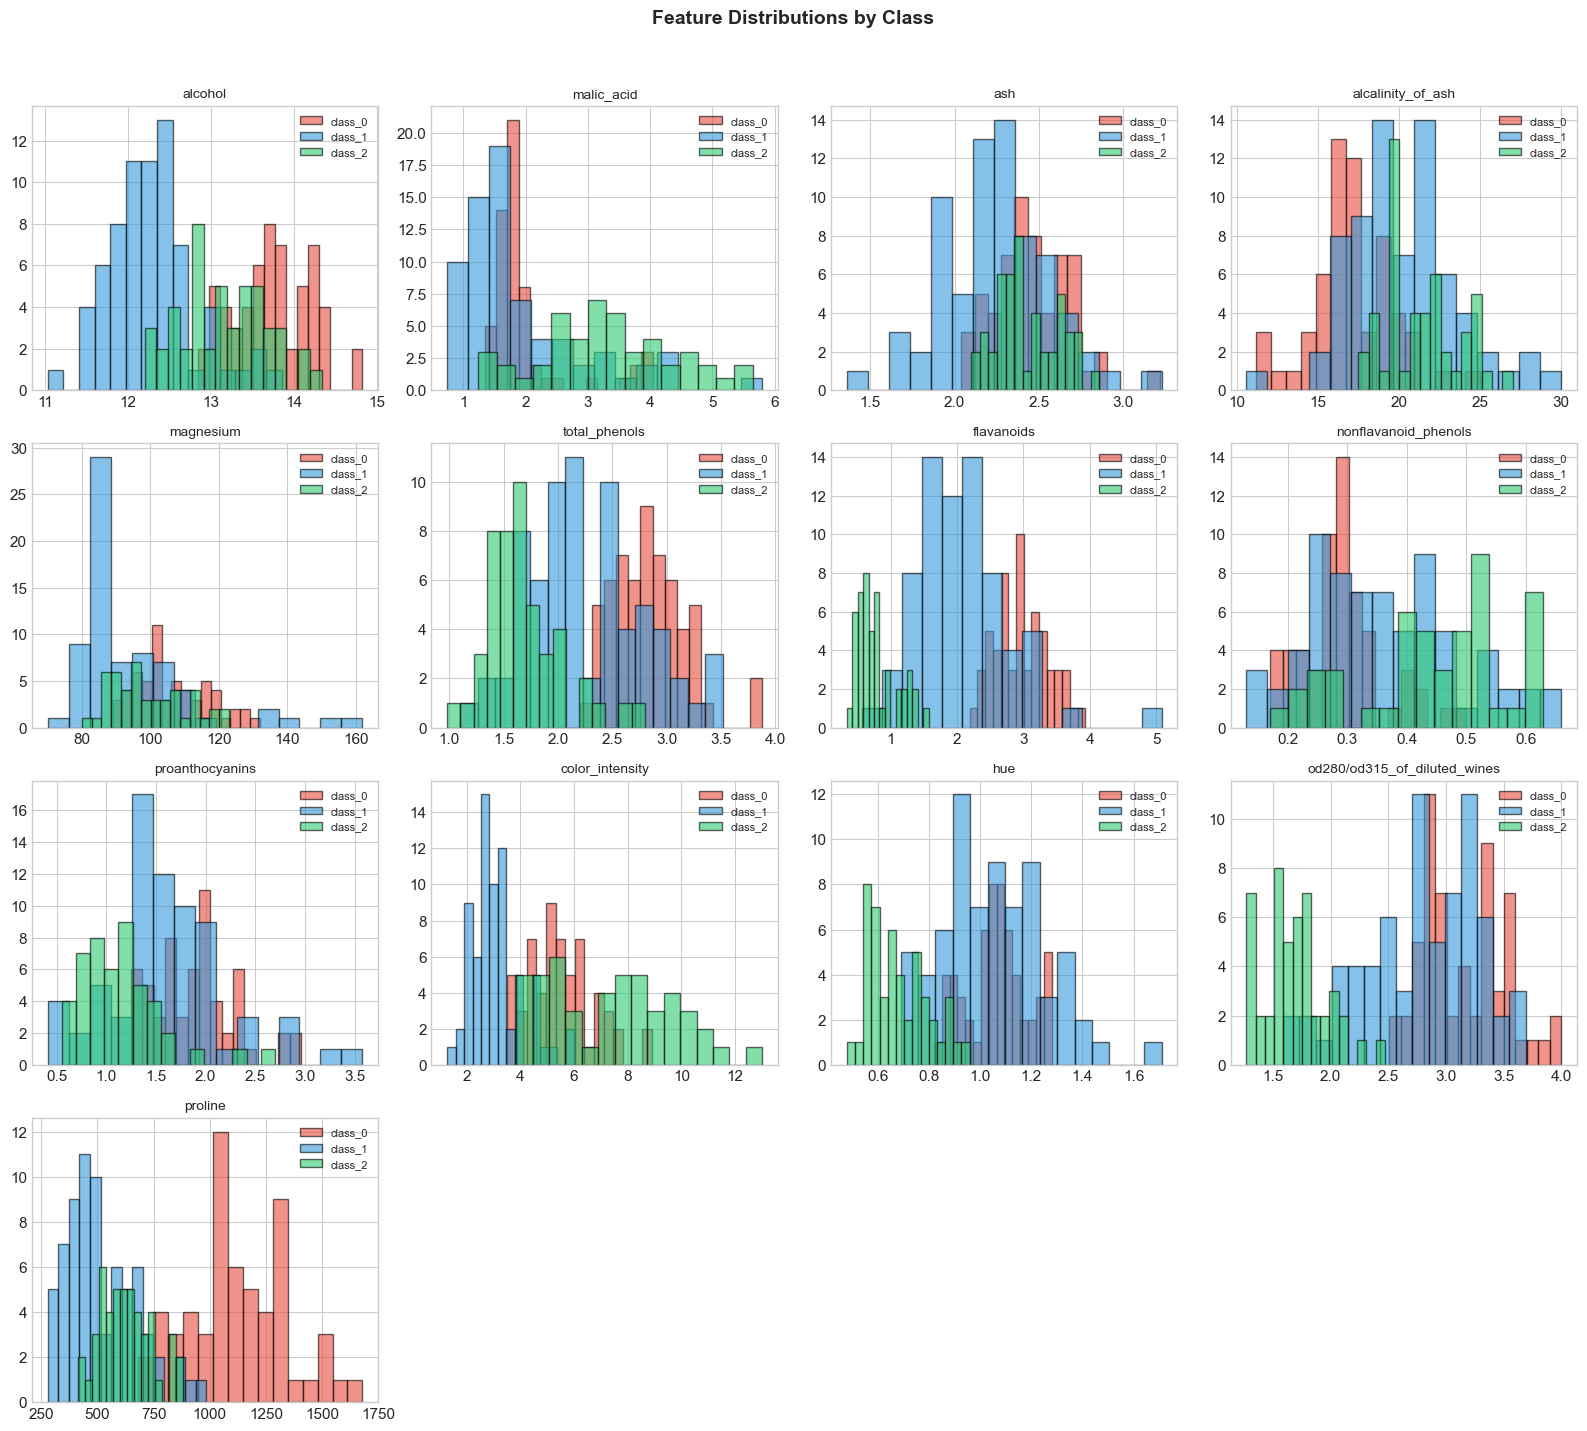

In [11]:
# 모든 특성의 분포 (히스토그램)
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

features = wine.feature_names
for idx, col in enumerate(features):
    for class_idx in range(3):
        data = df[df['target'] == class_idx][col]
        axes[idx].hist(data, bins=15, alpha=0.6, label=wine.target_names[class_idx], 
                       color=colors[class_idx], edgecolor='black')
    axes[idx].set_title(col, fontsize=10)
    axes[idx].legend(fontsize=8)

# 빈 subplot 숨기기
for idx in range(len(features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Feature Distributions by Class', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

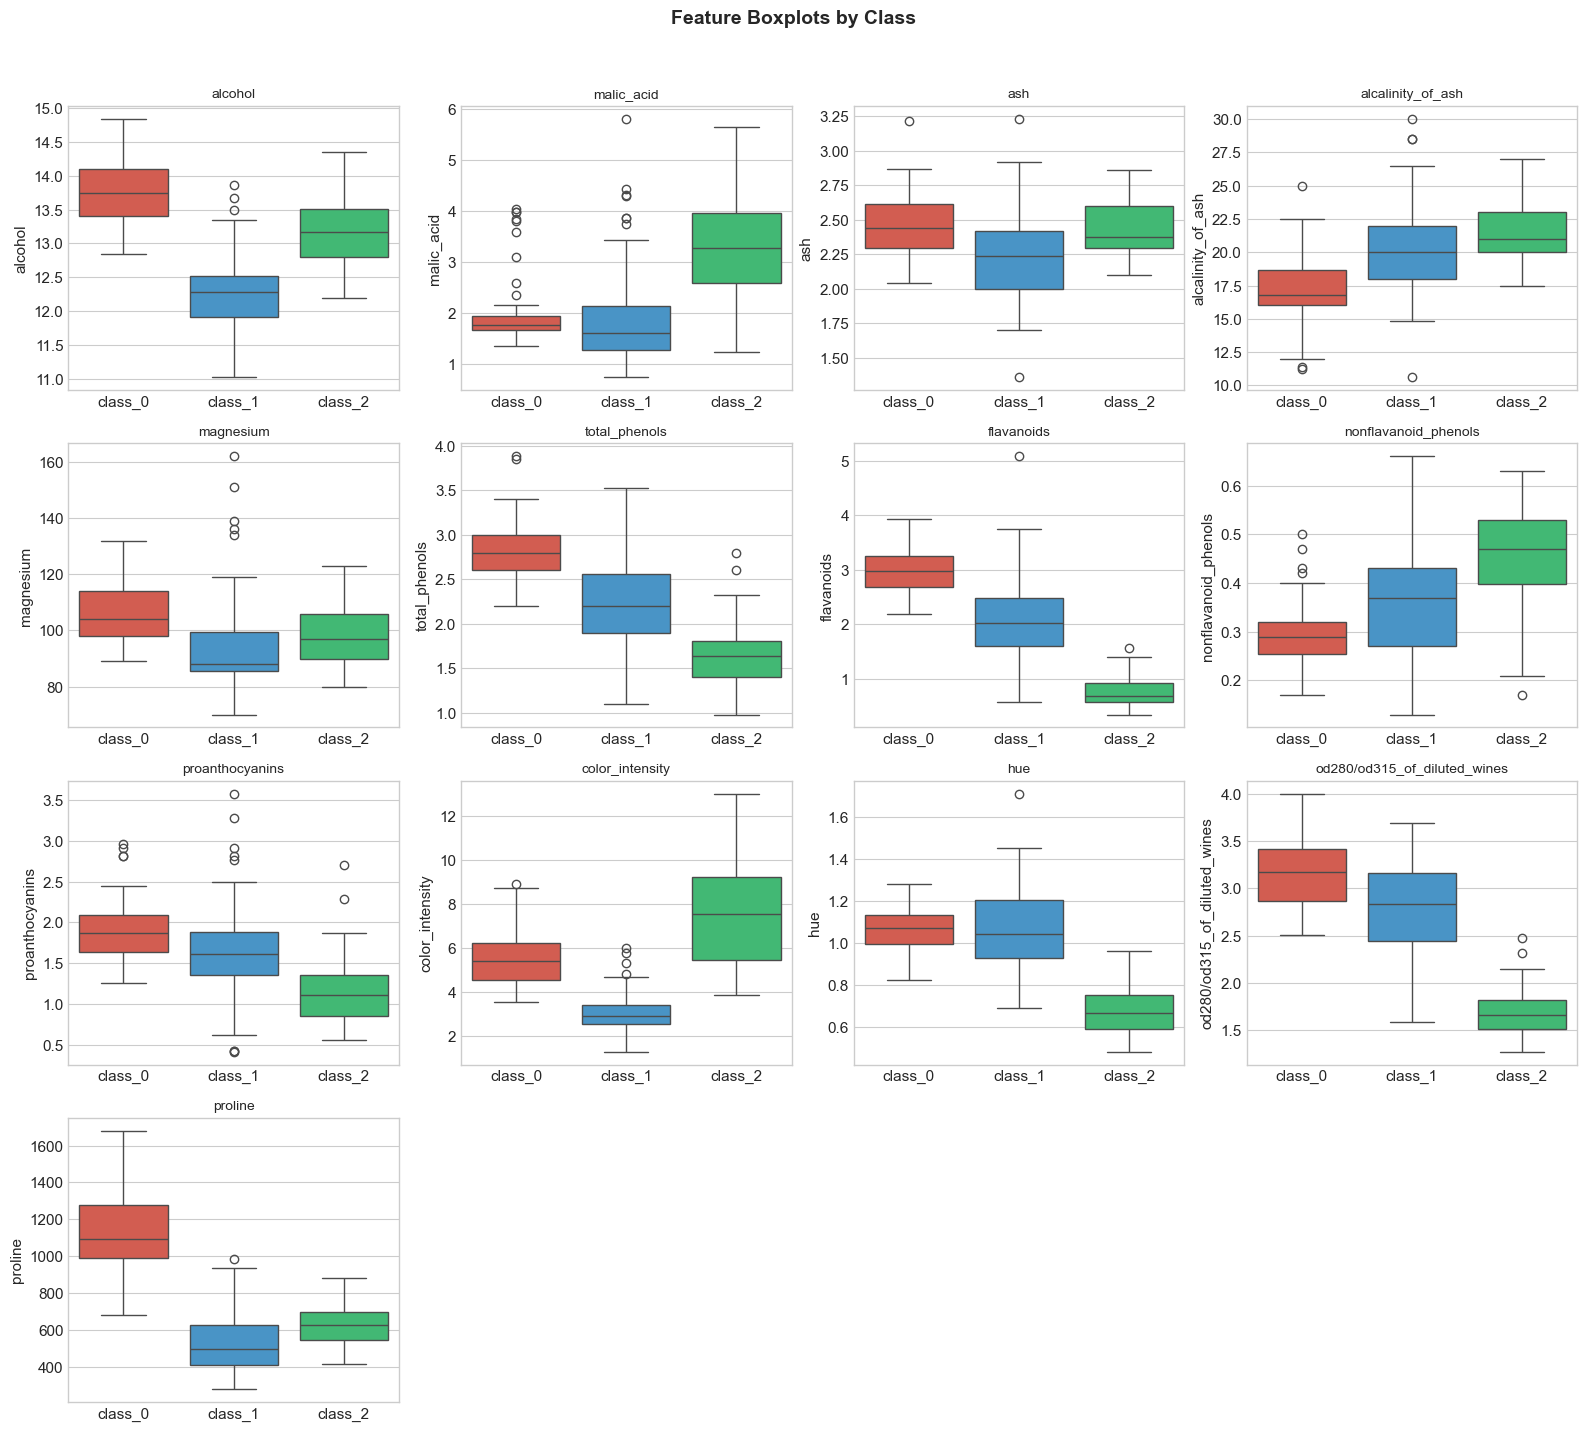

In [12]:
# 박스플롯으로 클래스별 특성 비교
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(features):
    sns.boxplot(data=df, x='target', y=col, ax=axes[idx], palette=colors)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_xticklabels(wine.target_names)

for idx in range(len(features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Feature Boxplots by Class', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2.4 상관관계 분석

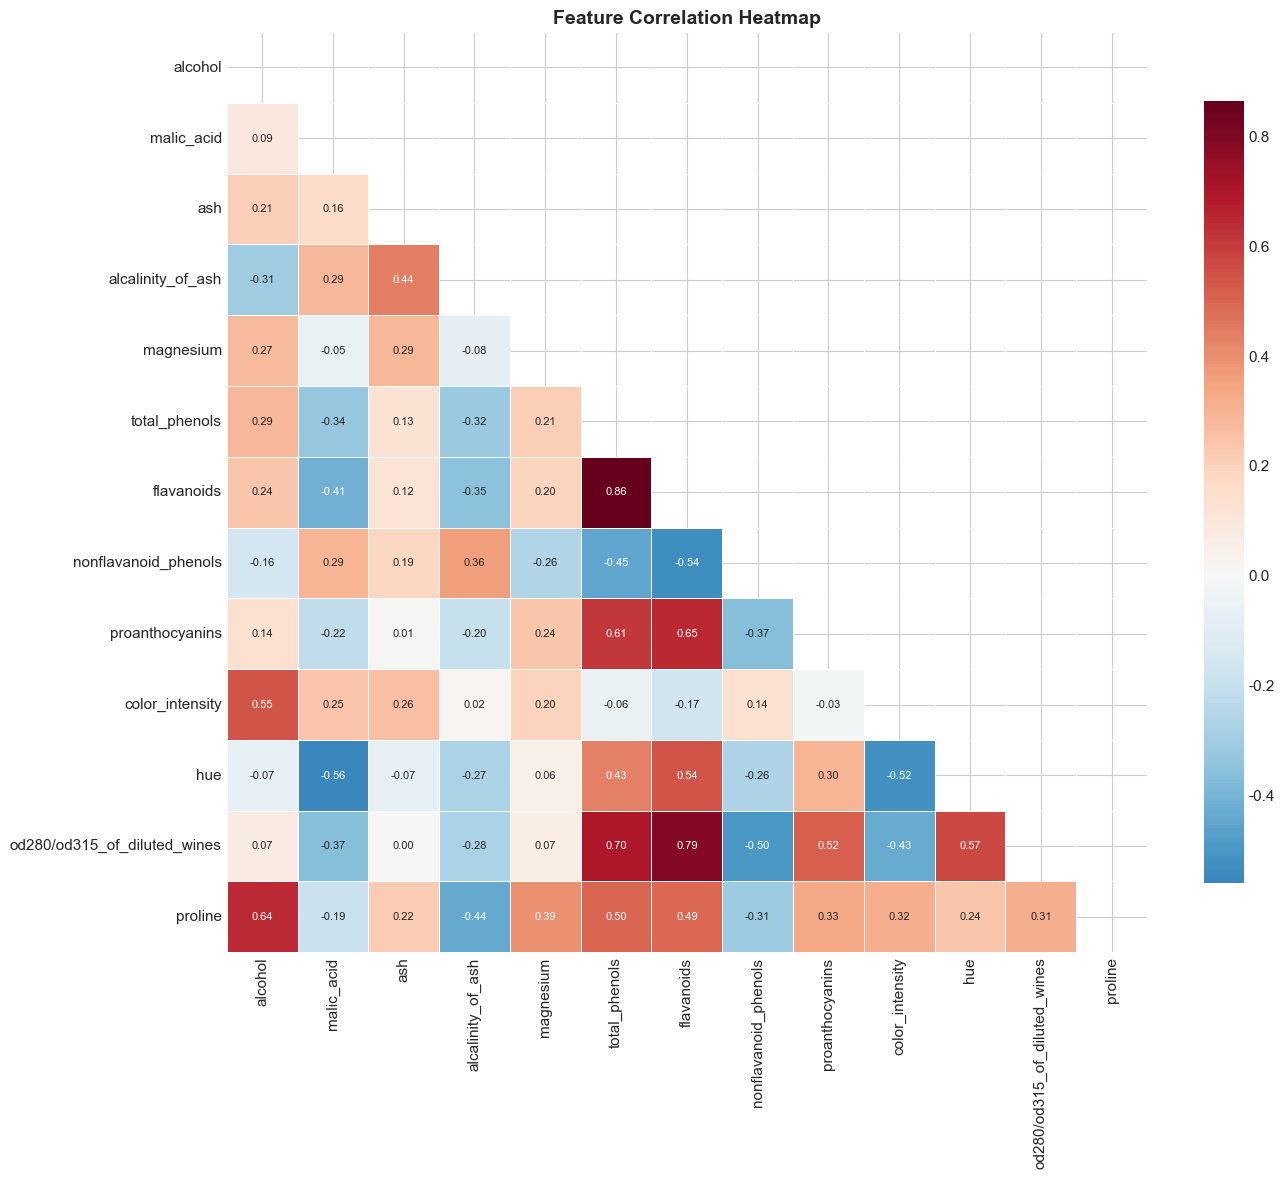

In [13]:
# 상관관계 히트맵
plt.figure(figsize=(14, 12))
correlation_matrix = df[features].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdBu_r', center=0, square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

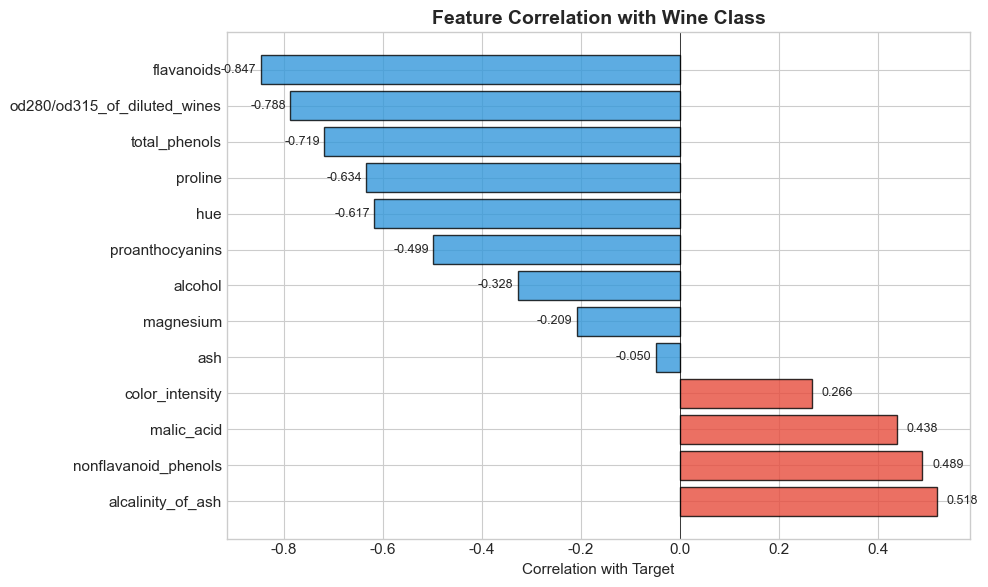

In [14]:
# 타겟과의 상관관계
target_corr = df[features + ['target']].corr()['target'].drop('target').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors_bar = ['#e74c3c' if x > 0 else '#3498db' for x in target_corr.values]
bars = plt.barh(target_corr.index, target_corr.values, color=colors_bar, edgecolor='black', alpha=0.8)
plt.xlabel('Correlation with Target')
plt.title('Feature Correlation with Wine Class', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

for bar, val in zip(bars, target_corr.values):
    plt.text(val + 0.02 if val > 0 else val - 0.08, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### 2.5 PCA를 통한 데이터 시각화

PCA 설명된 분산 비율:
  PC1: 36.20%
  PC2: 19.21%
  Total: 55.41%


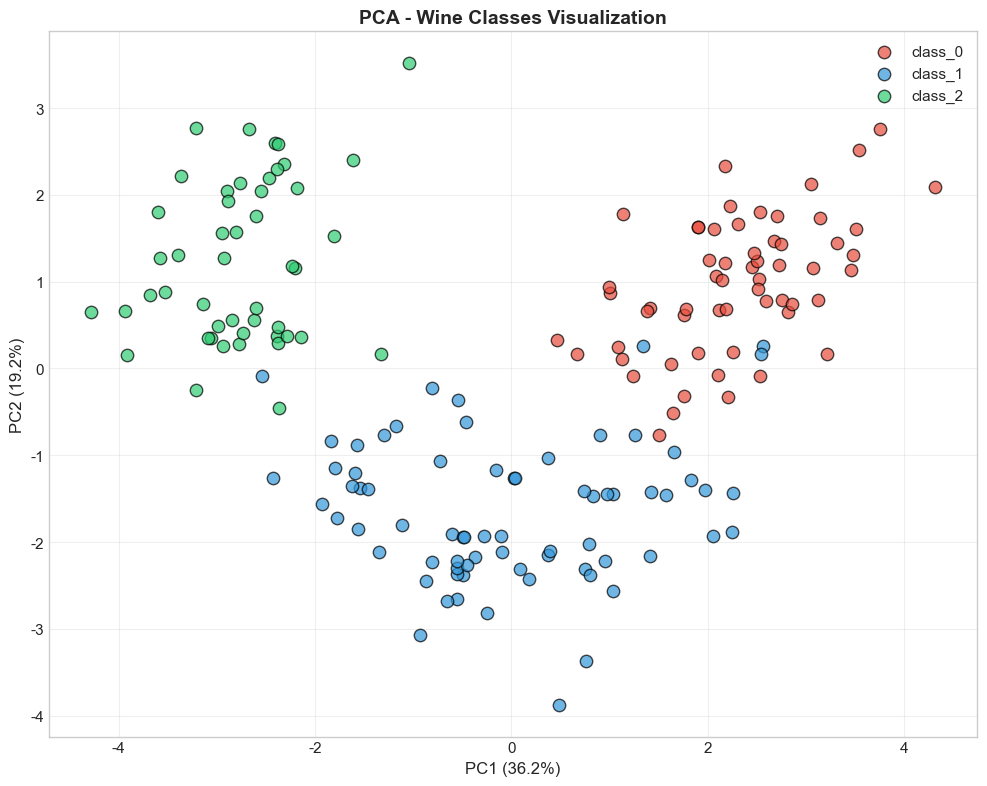

In [15]:
# PCA로 2D 시각화
X_features = df[features].values
y_target = df['target'].values

# 스케일링 후 PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA 설명된 분산 비율:")
print(f"  PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"  Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# 시각화
plt.figure(figsize=(10, 8))
for class_idx in range(3):
    mask = y_target == class_idx
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[class_idx], 
                label=wine.target_names[class_idx], alpha=0.7, s=80, edgecolors='black')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title('PCA - Wine Classes Visualization', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## 3. 데이터 전처리

In [16]:
# 특성과 타겟 분리
X = df[features]
y = df['target']

print(f"특성 shape: {X.shape}")
print(f"타겟 shape: {y.shape}")

특성 shape: (178, 13)
타겟 shape: (178,)


In [17]:
# 데이터 분할 (Train: 80%, Test: 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train 크기: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test 크기: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.0f}%)")
print(f"\nTrain 클래스 분포:")
print(y_train.value_counts().sort_index())
print(f"\nTest 클래스 분포:")
print(y_test.value_counts().sort_index())

Train 크기: 142 (80%)
Test 크기: 36 (20%)

Train 클래스 분포:
target
0    47
1    57
2    38
Name: count, dtype: int64

Test 클래스 분포:
target
0    12
1    14
2    10
Name: count, dtype: int64


In [18]:
# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("StandardScaler 적용 완료!")
print(f"\n스케일링 전 (Train):")
print(f"  Mean: {X_train.mean().mean():.4f}")
print(f"  Std: {X_train.std().mean():.4f}")
print(f"\n스케일링 후 (Train):")
print(f"  Mean: {X_train_scaled.mean():.4f}")
print(f"  Std: {X_train_scaled.std():.4f}")

StandardScaler 적용 완료!

스케일링 전 (Train):
  Mean: 68.5522
  Std: 25.1933

스케일링 후 (Train):
  Mean: 0.0000
  Std: 1.0000


In [ ]:
pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

---
## 4. 분류 모델 학습 및 평가

In [21]:
# 분류 모델 정의
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB()
}

print(f"총 {len(models)}개의 분류 모델을 학습합니다.")

총 8개의 분류 모델을 학습합니다.


In [22]:
# 모델 학습 및 평가
results = []
trained_models = {}

print("모델 학습 및 평가 진행 중...")
print("=" * 80)

for name, model in models.items():
    # 스케일링이 필요한 모델 구분
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'SVM (RBF)']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # 학습된 모델 저장
    trained_models[name] = model
    
    # 평가 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_mean,
        'CV Std': cv_std
    })
    
    print(f"{name:22s} | Acc: {accuracy:.4f} | F1: {f1:.4f} | CV: {cv_mean:.4f} (+/- {cv_std:.4f})")

# 결과 데이터프레임
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print("\n" + "=" * 80)
print("모델 성능 순위 (Accuracy 기준):")
results_df

모델 학습 및 평가 진행 중...
Logistic Regression    | Acc: 0.9722 | F1: 0.9720 | CV: 0.9860 (+/- 0.0172)
K-Nearest Neighbors    | Acc: 0.9722 | F1: 0.9724 | CV: 0.9510 (+/- 0.0354)
Decision Tree          | Acc: 0.9444 | F1: 0.9450 | CV: 0.9163 (+/- 0.0514)
Random Forest          | Acc: 1.0000 | F1: 1.0000 | CV: 0.9862 (+/- 0.0276)
Gradient Boosting      | Acc: 0.9444 | F1: 0.9443 | CV: 0.9584 (+/- 0.0402)
AdaBoost               | Acc: 0.9167 | F1: 0.9165 | CV: 0.9438 (+/- 0.0575)
SVM (RBF)              | Acc: 0.9722 | F1: 0.9720 | CV: 0.9862 (+/- 0.0276)
Naive Bayes            | Acc: 0.9722 | F1: 0.9723 | CV: 0.9719 (+/- 0.0344)

모델 성능 순위 (Accuracy 기준):


,Model,Accuracy,Precision,Recall,F1-Score,CV Mean,CV Std
3,Random Forest,1.000000,1.000000,1.000000,1.000000,0.986207,0.027586
0,Logistic Regression,0.972222,0.974074,0.972222,0.971970,0.985961,0.017199
1,K-Nearest Neighbors,0.972222,0.974747,0.972222,0.972369,0.950985,0.035372
7,Naive Bayes,0.972222,0.974359,0.972222,0.972263,0.971921,0.034398
6,SVM (RBF),0.972222,0.974074,0.972222,0.971970,0.986207,0.027586
2,Decision Tree,0.944444,0.951389,0.944444,0.944961,0.916256,0.051359
4,Gradient Boosting,0.944444,0.946581,0.944444,0.944269,0.958374,0.040174
5,AdaBoost,0.916667,0.922466,0.916667,0.916529,0.943842,0.057498


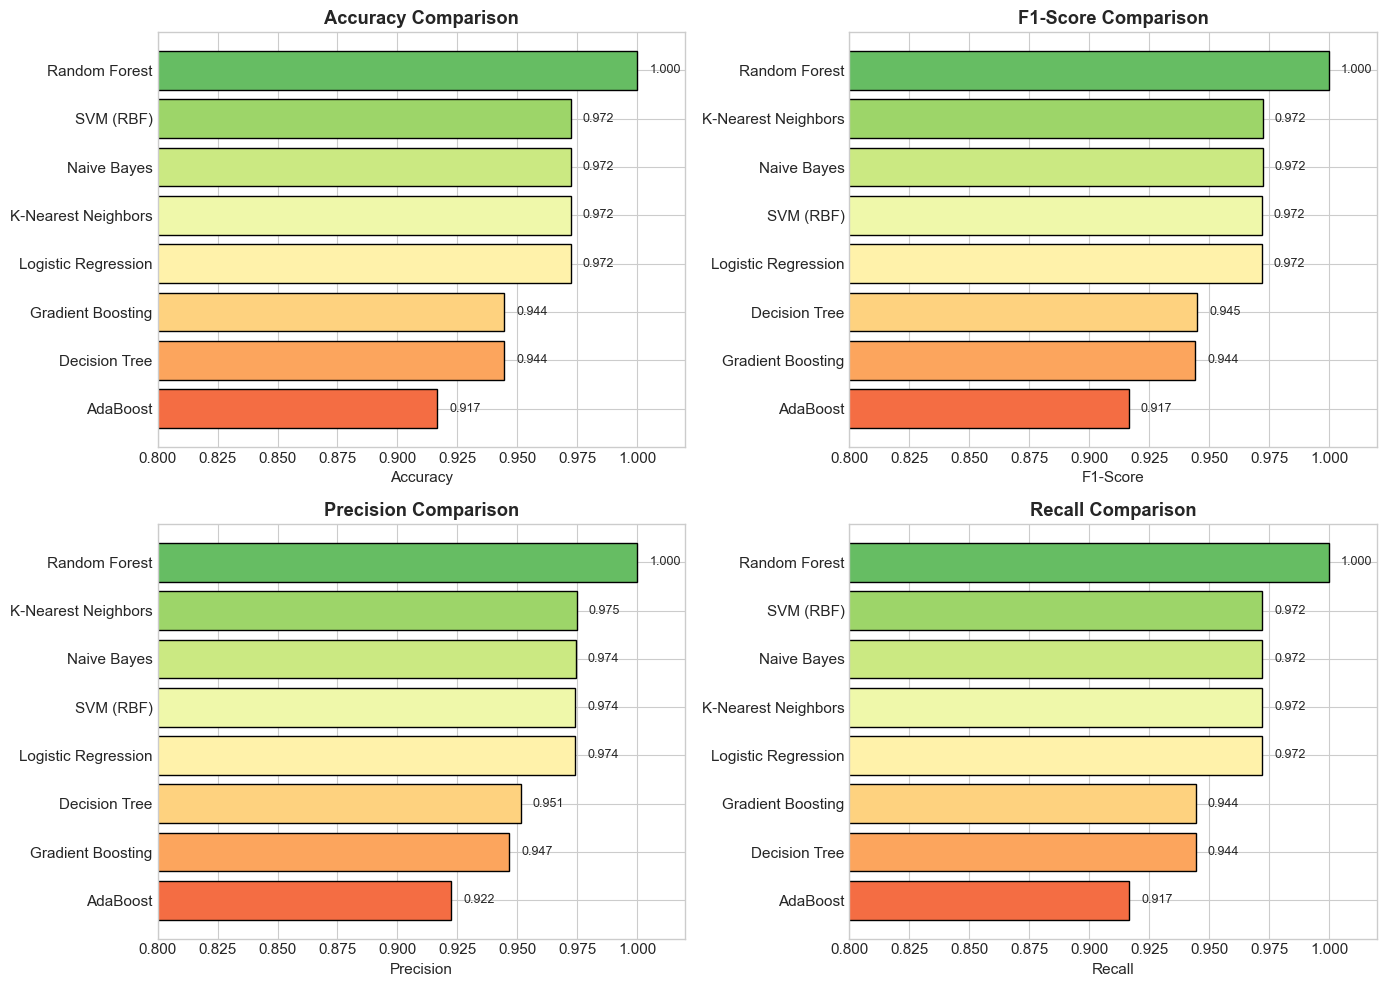

In [23]:
# 모델 성능 비교 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall']
color_palette = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(results_df)))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    sorted_df = results_df.sort_values(metric, ascending=True)
    bars = ax.barh(sorted_df['Model'], sorted_df[metric], color=color_palette, edgecolor='black')
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_xlim(0.8, 1.02)
    
    # 값 표시
    for bar, val in zip(bars, sorted_df[metric]):
        ax.text(val + 0.005, bar.get_y() + bar.get_height()/2, 
                f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

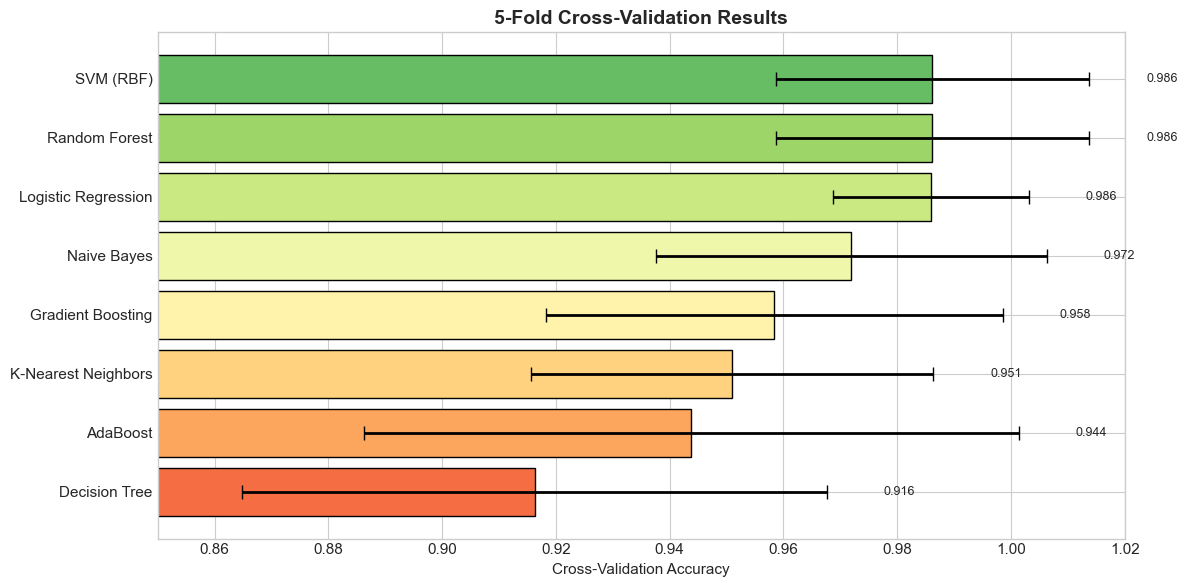

In [24]:
# Cross-Validation 결과 비교
plt.figure(figsize=(12, 6))

cv_sorted = results_df.sort_values('CV Mean', ascending=True)
colors_cv = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(cv_sorted)))

bars = plt.barh(cv_sorted['Model'], cv_sorted['CV Mean'], 
                xerr=cv_sorted['CV Std'], color=colors_cv, edgecolor='black',
                capsize=5, error_kw={'linewidth': 2})
plt.xlabel('Cross-Validation Accuracy')
plt.title('5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
plt.xlim(0.85, 1.02)

for bar, mean, std in zip(bars, cv_sorted['CV Mean'], cv_sorted['CV Std']):
    plt.text(mean + std + 0.01, bar.get_y() + bar.get_height()/2,
             f'{mean:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

---
## 5. 상세 모델 분석

### 5.1 Confusion Matrix

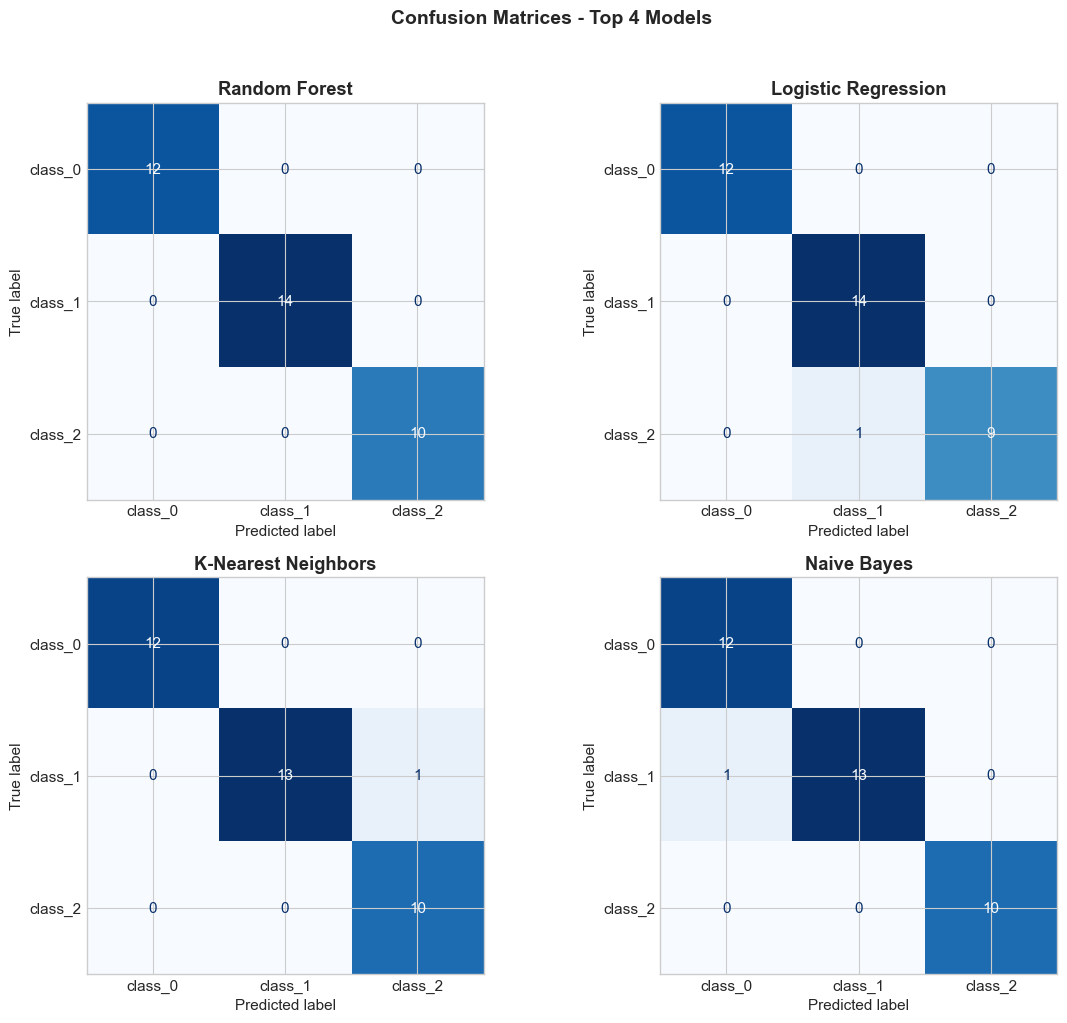

In [25]:
# 상위 4개 모델의 Confusion Matrix
top_models = results_df.head(4)['Model'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, name in enumerate(top_models):
    model = trained_models[name]
    
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'SVM (RBF)']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=wine.target_names)
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f'{name}', fontweight='bold')

plt.suptitle('Confusion Matrices - Top 4 Models', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.2 Classification Report (Best Model)

In [26]:
# Best Model의 상세 리포트
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'SVM (RBF)']:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

print(f"Best Model: {best_model_name}")
print("=" * 60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=wine.target_names))

Best Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 5.3 Feature Importance (Tree-based Models)

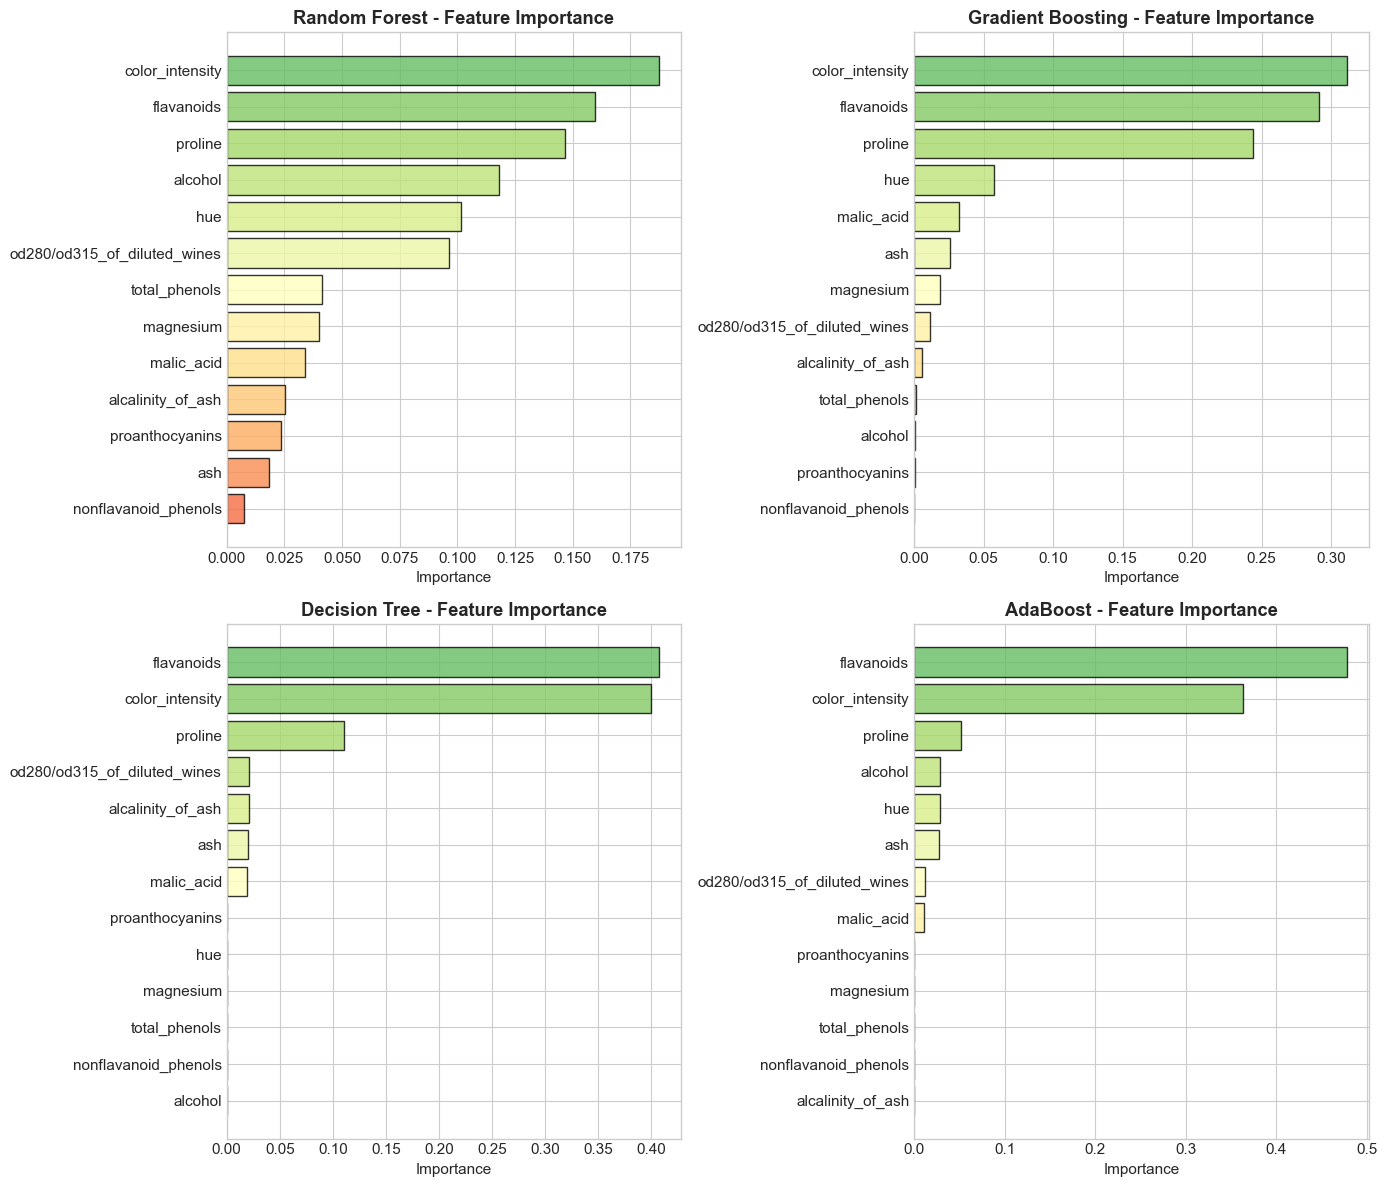

In [27]:
# Feature Importance 비교 (Tree-based 모델)
tree_models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'AdaBoost']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, name in enumerate(tree_models):
    model = trained_models[name]
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    colors_fi = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(importance)))
    axes[idx].barh(importance['Feature'], importance['Importance'], 
                   color=colors_fi, edgecolor='black', alpha=0.8)
    axes[idx].set_xlabel('Importance')
    axes[idx].set_title(f'{name} - Feature Importance', fontweight='bold')

plt.tight_layout()
plt.show()

---
## 6. 하이퍼파라미터 튜닝

In [28]:
# Random Forest 하이퍼파라미터 튜닝
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search_rf = GridSearchCV(
    rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)
grid_search_rf.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search_rf.best_params_}")
print(f"Best CV Score: {grid_search_rf.best_score_:.4f}")

Fitting 5 folds for each of 135 candidates, totalling 675 fits

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.9862


In [29]:
# SVM 하이퍼파라미터 튜닝
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'poly']
}

svm = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(
    svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)
grid_search_svm.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {grid_search_svm.best_params_}")
print(f"Best CV Score: {grid_search_svm.best_score_:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.9862


In [30]:
# 튜닝된 모델 최종 평가
print("튜닝된 모델 최종 평가")
print("=" * 60)

# Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"\nTuned Random Forest:")
print(f"  Accuracy: {acc_rf:.4f}")
print(f"  F1-Score: {f1_rf:.4f}")

# SVM
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"\nTuned SVM:")
print(f"  Accuracy: {acc_svm:.4f}")
print(f"  F1-Score: {f1_svm:.4f}")

튜닝된 모델 최종 평가

Tuned Random Forest:
  Accuracy: 1.0000
  F1-Score: 1.0000

Tuned SVM:
  Accuracy: 0.9722
  F1-Score: 0.9720


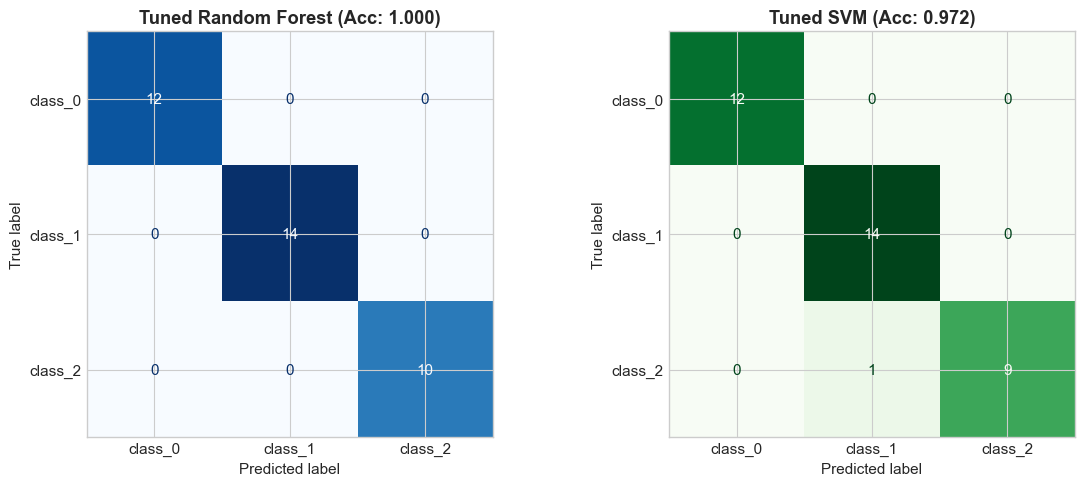

In [31]:
# 튜닝된 모델 Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=wine.target_names)
disp_rf.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title(f'Tuned Random Forest (Acc: {acc_rf:.3f})', fontweight='bold')

# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm, display_labels=wine.target_names)
disp_svm.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title(f'Tuned SVM (Acc: {acc_svm:.3f})', fontweight='bold')

plt.tight_layout()
plt.show()

---
## 7. 최종 결과 요약

In [ ]:
print("=" * 70)
print("           Scikit-learn Wine Classification - 최종 결과")
print("=" * 70)

print("\n[1] 데이터 개요")
print(f"    - 전체 샘플 수: {len(df)}")
print(f"    - 특성 수: {len(features)}")
print(f"    - 클래스 수: 3 ({', '.join(wine.target_names)})")
print(f"    - Train/Test: {len(X_train)}/{len(X_test)}")

print("\n[2] 기본 모델 성능 (Top 3)")
for idx, row in results_df.head(3).iterrows():
    print(f"    {results_df.head(3).index.tolist().index(idx)+1}. {row['Model']}: Acc={row['Accuracy']:.4f}, F1={row['F1-Score']:.4f}")

print("\n[3] 튜닝된 모델 성능")
print(f"    - Random Forest: Acc={acc_rf:.4f}, F1={f1_rf:.4f}")
print(f"    - SVM (RBF): Acc={acc_svm:.4f}, F1={f1_svm:.4f}")

print("\n[4] 주요 특성 (Random Forest 기준)")
top_features_rf = pd.DataFrame({
    'Feature': features,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False).head(5)
for i, (_, row) in enumerate(top_features_rf.iterrows(), 1):
    print(f"    {i}. {row['Feature']}: {row['Importance']:.4f}")

print("\n" + "=" * 70)

In [ ]:
# 최종 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 모든 모델 Accuracy 비교
models_sorted = results_df.sort_values('Accuracy', ascending=True)
colors_all = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(models_sorted)))
axes[0].barh(models_sorted['Model'], models_sorted['Accuracy'], 
             color=colors_all, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Accuracy')
axes[0].set_title('All Models - Accuracy Comparison', fontweight='bold')
axes[0].set_xlim(0.9, 1.01)
axes[0].axvline(x=max(acc_rf, acc_svm), color='red', linestyle='--', 
                label=f'Tuned Best: {max(acc_rf, acc_svm):.3f}')
axes[0].legend()

# Feature Importance (Best Tuned Random Forest)
importance_final = pd.DataFrame({
    'Feature': features,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=True)

colors_fi = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(importance_final)))
axes[1].barh(importance_final['Feature'], importance_final['Importance'],
             color=colors_fi, edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Importance')
axes[1].set_title('Tuned Random Forest - Feature Importance', fontweight='bold')

plt.tight_layout()
plt.show()

---
## 8. 결론

### 주요 발견사항

1. **데이터 특성**
   - 178개 샘플, 13개 특성, 3개 클래스
   - 클래스 분포가 비교적 균형적
   - PCA 결과 2개 주성분으로 약 55% 분산 설명

2. **모델 성능**
   - 대부분의 모델이 90% 이상의 높은 정확도 달성
   - 앙상블 모델(Random Forest, Gradient Boosting)이 우수한 성능
   - SVM도 스케일링 후 높은 성능 발휘

3. **중요 특성**
   - `proline`, `flavanoids`, `color_intensity`가 분류에 중요
   - `alcohol`, `od280/od315_of_diluted_wines`도 유의미한 기여

4. **하이퍼파라미터 튜닝**
   - GridSearchCV를 통한 최적화로 성능 향상
   - 튜닝된 Random Forest와 SVM 모두 우수한 일반화 성능

### 권장 사항
- 프로덕션 환경에서는 Random Forest 또는 SVM 권장
- 해석 가능성이 중요한 경우 Decision Tree 또는 Logistic Regression 고려